In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
data_dir = r"../data/RawData.xlsx"

In [7]:
raw = pd.read_excel(data_dir,sheet_name="HangSeng Index Data")

In [8]:
raw.head()

,Ntime,Time,Closing Price,Open Price,High price,Low Price,Volume,MACD,CCI,ATR,...,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD,US Dollar Index,HIBOR
0,20080702,733591,21704.4492,21785.3906,21938.1992,21555.5293,254858.26,-646.053200,-193.115118,546.4805,...,22956.709411,22497.96286,-751.5703,22187.92768,-887.8516,-5.754486,-0.069509,-401619.369837,71.99,1.6
1,20080703,733592,21242.7793,21389.4902,21742.0703,21163.5703,272528.48,-702.282620,-186.955957,578.5000,...,22793.477972,22289.66071,-1392.3806,21909.45156,-1786.9102,-7.872373,-0.068201,-507305.257079,72.73,1.6
2,20080704,733593,21423.8203,21402.1699,21534.0508,21344.8496,179634.42,-723.891770,-133.742667,291.2715,...,22663.034384,22152.28180,-1031.8496,21703.08164,-1634.1699,-8.153977,-0.058111,-398848.614015,72.71,1.6
3,20080707,733596,21913.0605,21402.6992,21916.2109,21402.6992,196457.92,-693.544830,-77.445777,513.5117,...,22591.608300,22069.02789,-129.2891,21677.22382,-1412.7403,-3.880007,-0.035303,-264228.169678,72.71,1.6
4,20080708,733597,21220.8105,21632.6992,21684.2109,21098.8398,201519.68,-717.087314,-108.634123,814.2207,...,22461.056128,21919.61285,-881.1993,21500.98396,-1576.7989,-6.703666,-0.055006,-518512.844172,72.96,1.6


### Wavelet transform
two level wavelet transformation with harr function

In [16]:
import pywt
from pywt import wavedec, waverec
from statsmodels.robust import mad

def waveletSmooth( x, wavelet="haar", level=2, declevel=2):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode='periodization',level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    #print("sigma: ",sigma)
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="hard" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode='periodization',axis=0 )
   
    return y
    #return y,sigma,uthresh

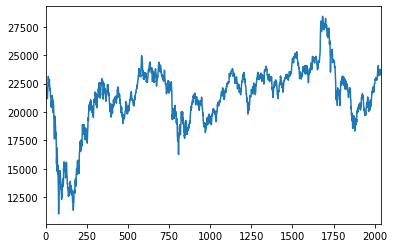

In [14]:
raw['Closing Price'].plot()

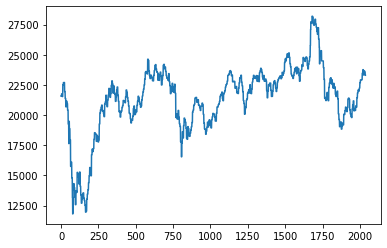

In [19]:
smooth = waveletSmooth(raw['Closing Price'])
plt.plot(smooth)

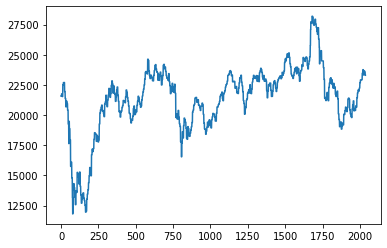

In [20]:
smooth2 = waveletSmooth(smooth)
plt.plot(smooth)